# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Yuanita TriHastutik Rachmawati]
- **Email:** [yuanitatri987@gmail.com]
- **ID Dicoding:** [yuanita_9dre]

## Menentukan Pertanyaan Bisnis

1. Day Review : Kapan terjadinya pelonjakan paling tinggi dan bagaimana kecenderungan waktu peminjaman oleh pengguna ?
2. Year Review: Apakah cuaca,dan hari kerja/libur/holiday berdampak pada peminjaman sepeda pada tahun 2012?

## Import Semua Packages/Library yang Digunakan

Penggunaan library yang didukung oleh python,
- pandas untuk membaca dataset yang berupa dataset yang bertype csv
- numpy untuk perhitungan matematika

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
dt_day= pd.read_csv('data/day.csv') #untuk data peminjaman sepeda
dt_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Memuat data peminjaman sepeda berdasarkan parameter yang sudah disediakan. terdapat 730 data dan 16 kolom parameter

In [4]:
# Load data menurut jam
dt_hour= pd.read_csv('data/hour.csv') #untuk data peminjaman sepeda
dt_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
Memuat data peminjaman sepeda berdasarkan setiap jam. terdapat 17378 row dan 17 kolom parameer.
1. instant: indeks peminjaman
2.dteday : tanggal peminjaman
3. season : musim (1,2,3)
4. yr : tahun (2011,2012)
5. mnth : bulan
7. holiday : hari libur (1), hari kerja (0)
8. weekday : hari kerja
9. workingday : hari kerja(1), hari libur (0)
10. weatherist : cuaca
11. temp : Suhu yang dinormalkan dalam Celcius. Nilainya diperoleh melalui (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (hanya dalam skala per jam)
12. atemp :
13. hum :  Kelembaban yang dinormalkan. Nilai dibagi menjadi 100 (maks)
14. windspeed: Kecepatan angin yang dinormalkan. Nilai dibagi menjadi 67 (maks)
15. casual: jumlah pengguna kasual
16. registered : jumlah pengguna terdaftar
17. count :jumlah pengguna keseluruhan

// Pada data hari memang tidak tidak ada kolom hr, karena rekap data sesuai harian.

### Assessing Data

In [5]:
dt_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
dt_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplikasi: ",dt_day.duplicated().sum())
dt_day.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Setelah dilakukan penilaian tidak terdapat missing value pada data hari, namun type data pada kolom dteday yang seharusnya bertype data datetime namun disini bertype data object, karena dateday merupakan data tanggal seperti tahun-bulan-tanggal

In [8]:
dt_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [9]:
dt_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ",dt_hour.duplicated().sum())
dt_hour.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


40.0 281.0 241.0
642.5 -321.5
Banyak data 17379
Banyak Outlier 505


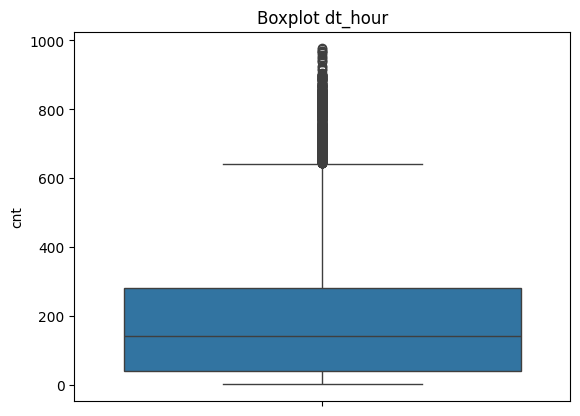

In [11]:
import matplotlib.pyplot as plt
# PENGECEKAN OUTLIER DT_HOURS
q1 = dt_hour['cnt'].quantile(0.25)
q3 = dt_hour['cnt'].quantile(0.75)

iqr = q3 - q1

atas = q3 + (1.5*iqr)
bawah = q1 - (1.5*iqr)


outliers = dt_hour.loc[(dt_hour['cnt'] > atas) | (dt_hour['cnt'] < bawah)]
print(q1,q3,iqr)
print(atas,bawah)
print("Banyak data",len(dt_hour))
print("Banyak Outlier", len(outliers))

plt.title("Boxplot dt_hour")
sns.boxplot(dt_hour['cnt'])
plt.show()

Q1: 3152.0
Q3: 5956.0
IQR: 2804.0
Batas bawah: -1054.0
Batas atas: 10162.0
Outlier: 0


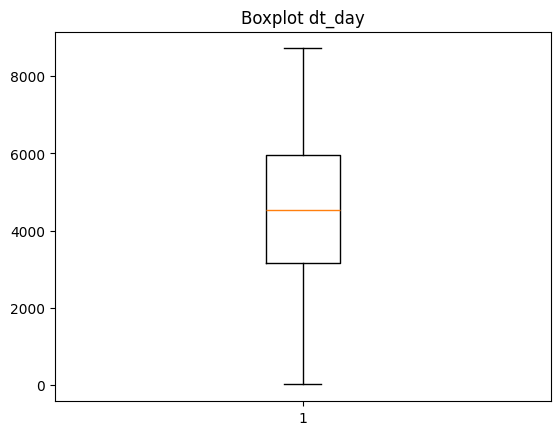

In [12]:

import matplotlib.pyplot as plt
Q1 = (dt_day['cnt']).quantile(0.25)
Q3 = (dt_day['cnt']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Batas bawah:", minimum)
print("Batas atas:", maximum)

outliers = dt_day[(dt_day['cnt'] > maximum) | (dt_day['cnt'] < minimum)]
print("Outlier:", len(outliers))

plt.boxplot(dt_day['cnt'])
plt.title("Boxplot dt_day")
plt.show()

**Insight:**
- Dalam rekap data hari tidak ditemukan missing valaue, dicek melalui dt_day.info(),terdapat 15 kolom dan 731 row, 16 type data.
- Dalam rekap data peminjaman per-jam tidak ditemukan juga missing value,dicek melalui dt_hour.info() terdapat 16 kolom dengan 17379 row, 17 type data.
- Namun terdapat kesalahan typedata dimana dteday seharusnya bertipe data datetime buka sebagai object, karena object diguanakan untuk string
- outliers = dt_hour.loc[(dt_hour['cnt'] > atas) | (dt_hour['cnt'] < bawah)] saya menggunakan method loc untuk mengetahui nilai outlier berdasarkan barisnya kemudian disimpan dalam variabel outliers
- Pada data_hour terdapat 505 nilai dari kolom cnt yang termasuk dalam outlier. Oleh karena itu harus dilakukan clean data pada data outlier

### Cleaning Data

Cleaning data dilakukan apabila terdapat data yang tidak akurat,missing value, pada dataset ini tidak terdapat missing value ataupun data yang duplikat. Namun saya mengubah type "object" dari kolom dteday ke type data datetime. Kemudian hal yang sama juga saya lakukan pada data_hour, karena terdapat kesalah type data pada dteday peminjaman. Saya juga melakukan clean data pada dt_hours untuk mendrop 505 data yang ditemukan outlier

1. Define : dt_day memiliki parameter instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt. Dengan target yang akan saya  analisis adalah mencari tahu penyebab minat peminjam sepeda sesuai dengan kategori hari/tahun. Karena terdapat kesalahan type data maka akan dilakukan perubahan type data terlebih dahulu.
2. Code : Eksekusi program
3. Test : Menjalankan kode program

In [13]:
dt_day["dteday"] = pd.to_datetime(dt_day['dteday'], format='%Y-%m-%d')
dt_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
dt_hour["dteday"] = pd.to_datetime(dt_hour['dteday'], format='%Y-%m-%d')
dt_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
dt_day['yr'] = dt_day['yr'].replace({0:2011, 1: 2012})
dt_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,2012,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,2012,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,2012,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,2012,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [16]:
dt_hour['yr'] = dt_hour['yr'].replace({0:2011, 1: 2012})
dt_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,2012,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,2012,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,2012,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,2012,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


40.0 281.0 241.0
642.5 -321.5
Banyak data : 17379
Banyak Outlier : 505
Banyak data baru: 16874


<function matplotlib.pyplot.show(close=None, block=None)>

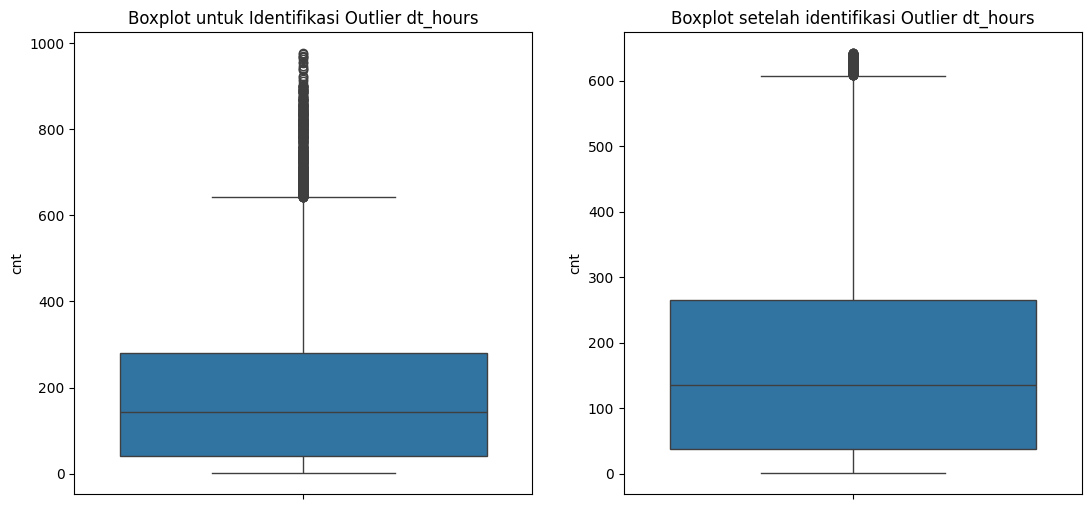

In [17]:

# # import matplotlib.pyplot as plt
q1 = dt_hour['cnt'].quantile(0.25)
q3 = dt_hour['cnt'].quantile(0.75)

iqr = q3 - q1

maximum = q3 + (1.5*iqr)
minimum = q1 - (1.5*iqr)

kondisi_lower_than = dt_hour['cnt'] < minimum
kondisi_more_than = dt_hour['cnt'] > maximum

# Menentukan data outlier (di luar bmaximum maximum dan minimum)
outlier = dt_hour.loc[(dt_hour['cnt'] >= maximum) | (dt_hour['cnt'] <= minimum)]

# Mendrop data yang outlier
new_dthour = dt_hour.drop(outlier.index)




print(q1,q3,iqr)
print(maximum,minimum)
print("Banyak data :",len(dt_hour))
print("Banyak Outlier :", len(outlier))
print("Banyak data baru:", len(new_dthour))


plt.figure(figsize=(13, 6))


plt.subplot(1, 2, 1)
plt.title("Boxplot untuk Identifikasi Outlier dt_hours")
sns.boxplot(dt_hour['cnt'])

plt.subplot(1, 2, 2)
plt.title("Boxplot setelah identifikasi Outlier dt_hours")
sns.boxplot(new_dthour['cnt'])

plt.show





**Insight:**
- Perubahan dilakukan pada kedua data memanfaatkan method dari library pandas yaitu pd.to_datetime dengan format year-month-day.
- Pada saat dicek kembali menggunakan dt_hour.info() dteday sudah berganti typedata dengan datetime64[ns]
- cleaning data saya menggunakan IQR
- Saya melakukan cleaning data untuk data outliers pada kolom cnt, menggunakan method loc untuk mengetahui nilai outlier dilihat dari baris pada kolom cnt outlier = dt_hour.loc[(dt_hour['cnt'] > atas) | (dt_hour['cnt'] < bawah)] fungsi tersebut untuk mengetahui nilai outlier yang lebih dari batas atas yang dihitung dari q3 + (1.5*iqr) kemudian kolom cnt yang kurang dari batas bawah. Perlu diketahui 
Q1:40.0 
Q2: 281.0 
IQR: 241.0
BA :642.5 
BW-321.5
Banyak data : 17379
Banyak Outlier : 505
Banyak data terbaru :  17379

## Exploratory Data Analysis (EDA)

### Explore ...

In [18]:
dt_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,2011.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,2011.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,2012.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,2012.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,2012.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [19]:
dt_day.groupby(by="weathersit").agg({
    "instant" : "nunique",
    "registered" :["max", "min", "mean", "std"]
})

instant registered                               
           nunique        max  min         mean          std
weathersit                                                  
1              463       6946  416  3912.755940  1533.347265
2              247       6844  491  3348.510121  1463.566884
3               21       4324   20  1617.809524  1068.290954

In [20]:
dt_day.groupby(by="workingday").agg({"registered" :["max", "min", "mean", "std"]})

registered                               
                  max  min         mean          std
workingday                                          
0                5966  451  2959.034632  1293.867686
1                6946   20  3978.250000  1568.692453

In [21]:
dt_day.groupby(by="season").instant.nunique().sort_values(ascending=True)

season
4    178
1    181
2    184
3    188
Name: instant, dtype: int64

In [22]:
dt_day.groupby(by="yr").casual.nunique().sort_values(ascending=False)

yr
2012    332
2011    328
Name: casual, dtype: int64

Dari pivot table diatas, pengelompokan data peminjaman sepeda berdasarkan musim. Melalui daftar pelanggan yang sudah register pada musim pertama(cuaca cerah) sebanyak 6946 dan paling sedikit 416, pada musim kedua sebanyak 6844 dan paling sedikit 491, pada musim ketiga terdapat penurunan 4324 dan paling sedikit 20 peminjam.

**Insight:**
- Perubahan saya lakukan pada dt_day mengganti kategori taun 2011=0, 2012=1 menggunakan method replace

## Visualization & Explanatory Analysis

### Pertanyaan 1:
1. Day Review : Dalam rentang waktu 2 tahun tersebut. Kapan terjadi lonjakan tertinggi sepeda harian dalam rentang waktu 2 tahun dan bagaimana pola waktu peminjaman sepeda oleh pengguna dalam sehari ?

In [23]:
group_df = dt_day.groupby('yr')['cnt'].sum().reset_index()
group_df



,yr,cnt
0,2011,1243103
1,2012,2049576


In [27]:

# #2011
by_2011 = dt_day[dt_day['yr'] == 2011]
hasil1=by_2011.groupby(by="dteday")['cnt'].sum()
sorted_hasil1 = hasil1.sort_values(ascending=False)
sorted_hasil1  #dihasilkan pada tanggal 2011-07-04 dengan jumlah 6043 (2011-07-04)


# #2012
# by_2012 = dt_day[dt_day['yr'] == 2012]
# hasil2=by_2012.groupby(by="dteday")['cnt'].sum()
# sorted_hasil2 = hasil2.sort_values(ascending=False)
# sorted_hasil2 #dihasilkan pada tanggal 2011-07-04 dengan jumlah 8714 (2012-09-15)




dteday
2011-07-04    6043
2011-07-16    5923
2011-08-23    5895
2011-05-21    5805
2011-07-15    5538
              ... 
2011-10-29     627
2011-03-10     623
2011-03-06     605
2011-01-26     506
2011-01-27     431
Name: cnt, Length: 365, dtype: int64

In [24]:
by_2012 = new_dthour[new_dthour['dteday'] == '2012-09-15'].reset_index()
by_2012

,index,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,14827,14828,2012-09-15,3,2012,9,0,0,6,0,1,0.60,0.5606,0.83,0.1045,38,169,207
1,14828,14829,2012-09-15,3,2012,9,1,0,6,0,1,0.60,0.5909,0.73,0.0000,8,101,109
2,14829,14830,2012-09-15,3,2012,9,2,0,6,0,1,0.58,0.5455,0.78,0.1045,18,75,93
3,14830,14831,2012-09-15,3,2012,9,3,0,6,0,1,0.60,0.5909,0.73,0.2537,6,31,37
4,14831,14832,2012-09-15,3,2012,9,4,0,6,0,2,0.60,0.5909,0.69,0.3582,3,3,6
5,14832,14833,2012-09-15,3,2012,9,5,0,6,0,1,0.58,0.5455,0.60,0.5224,1,15,16
6,14833,14834,2012-09-15,3,2012,9,6,0,6,0,1,0.54,0.5152,0.49,0.4179,6,27,33
7,14834,14835,2012-09-15,3,2012,9,7,0,6,0,1,0.54,0.5152,0.52,0.2836,10,63,73
8,14835,14836,2012-09-15,3,2012,9,8,0,6,0,1,0.56,0.5303,0.49,0.4179,43,169,212
9,14836,14837,2012-09-15,3,2012,9,9,0,6,0,1,0.60,0.6212,0.43,0.4179,79,263,342


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5272\722600260.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar=sns.barplot(


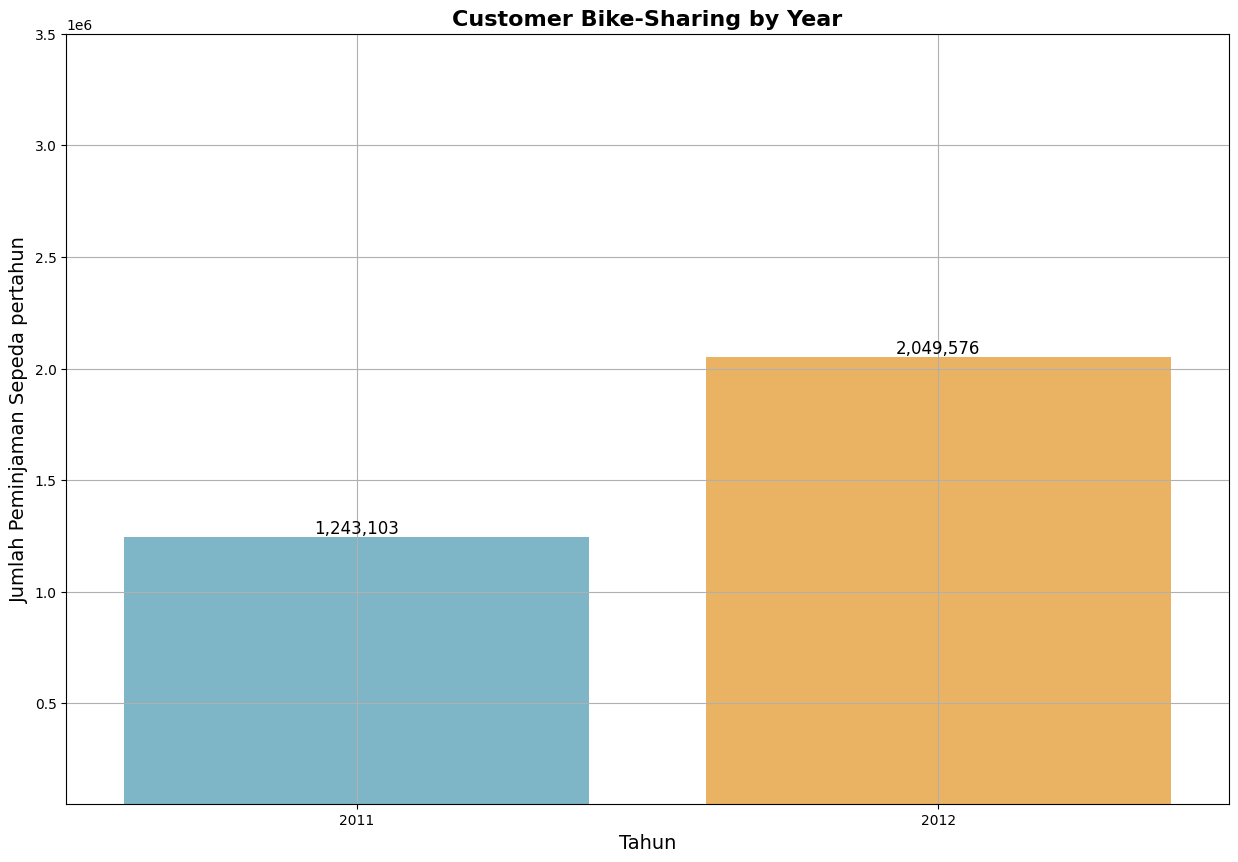

In [25]:
plt.figure(figsize=(15, 10))
colors = ['#72BCD4', '#FFB74D']

bar=sns.barplot(
    x='yr',
    y='cnt',
    data=group_df, palette=colors)

for p in bar.patches:
    bar.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=12)
plt.title('Customer Bike-Sharing by Year', fontsize=16, fontweight= 'bold')
plt.xlabel('Tahun', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['2011', '2012'])
plt.ylabel('Jumlah Peminjaman Sepeda pertahun', fontsize=14)
plt.ylim(50000,3500000)
plt.grid(True)
plt.show()


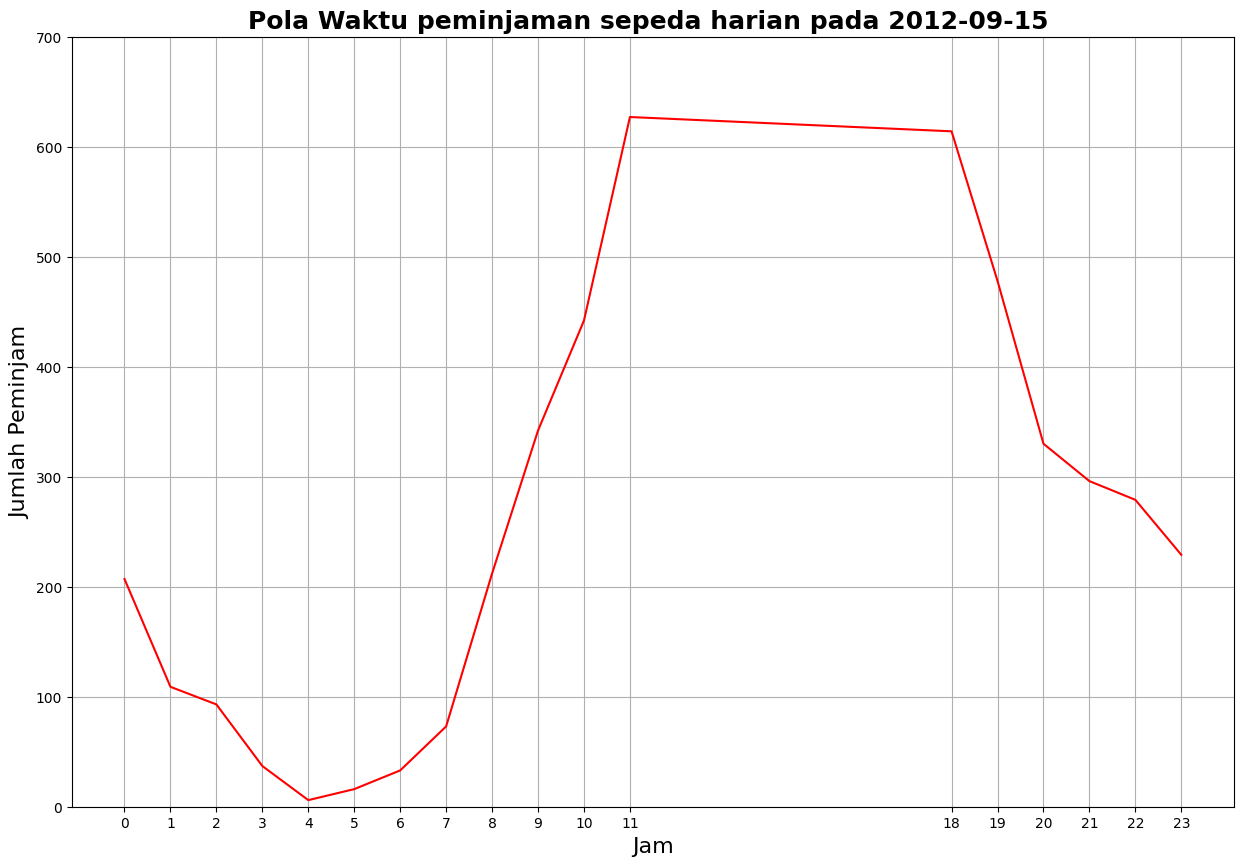

In [26]:
hari =new_dthour[new_dthour['dteday'] == '2012-09-15']
jam = hari['hr']
jumlah = hari['cnt']
regist = hari['registered']

plt.figure(figsize=(15, 10))
plt.plot(jam,jumlah, color='red')
plt.title ("Pola Waktu peminjaman sepeda harian pada 2012-09-15 ",fontsize=18, fontweight='bold')
plt.ylabel ("Jumlah Peminjam", fontsize=16)
plt.ylim(0,700)
plt.xlabel ("Jam",fontsize=16)
plt.xticks(jam)
plt.grid(True)
plt.show()

### Pertanyaan 2:

2. Apakah cuaca,dan hari kerja/libur/holiday berdampak pada peminjaman sepeda pada tahun 2012?

   weathersit          cnt
0           1  6003.734177
1           2  4991.333333
2           3  2126.166667
   holiday          cnt
0        0  5637.078873
1        1  4401.181818
   workingday          cnt
0           0  5288.189655
1           1  5744.584000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5272\1664856609.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather, palette='viridis')


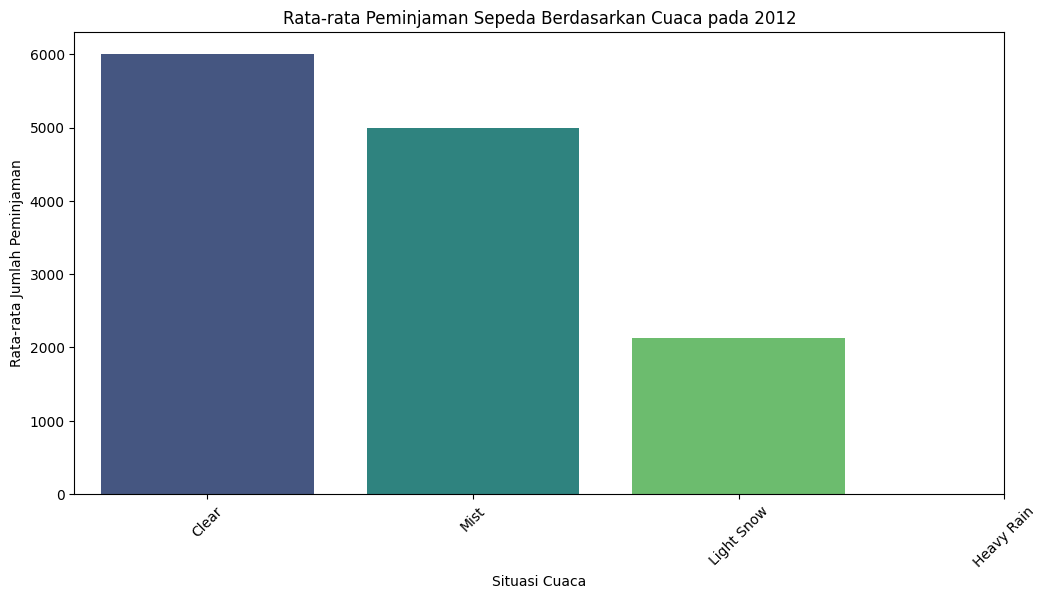

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5272\1664856609.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='cnt', data=holiday, palette='viridis')


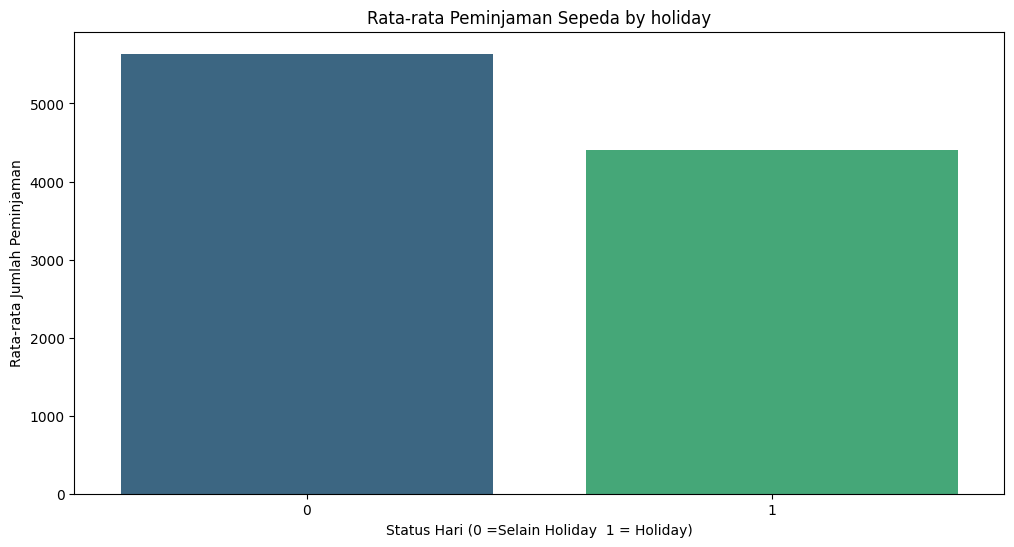

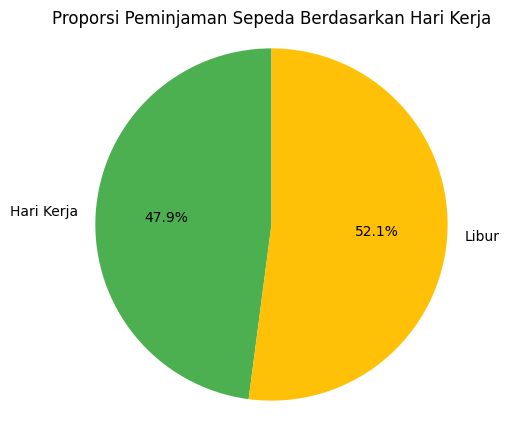

<Figure size 640x480 with 0 Axes>

In [28]:
by2012 = dt_day[dt_day['yr'] == 2012]
by2012

weather= by2012.groupby('weathersit')['cnt'].mean().reset_index()
print(weather)

holiday = by2012.groupby('holiday')['cnt'].mean().reset_index()
print(holiday)

work = by2012.groupby('workingday')['cnt'].mean().reset_index()
print(work)

plt.figure(figsize=(12, 6))
sns.barplot(x='weathersit', y='cnt', data=weather, palette='viridis')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Cuaca pada 2012')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Snow', 'Heavy Rain'], rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='holiday', y='cnt', data=holiday, palette='viridis')
plt.title('Rata-rata Peminjaman Sepeda by holiday')
plt.xlabel('Status Hari (0 =Selain Holiday  1 = Holiday)')
plt.ylabel('Rata-rata Jumlah Peminjaman')


total = work.set_index('workingday')['cnt']
plt.figure(figsize=(5, 5))
plt.pie(total, labels=['Hari Kerja', 'Libur'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FFC107'])
plt.title('Proporsi Peminjaman Sepeda Berdasarkan Hari Kerja')
plt.axis('equal')  # Menjaga proporsi lingkaran
plt.show()

plt.tight_layout()
plt.show()

**Insight:**
- Pertanyaan 1 : Pelonjakan paling tinggi antara 2011-2012 terjadi pada 2012-09-15 dengan jumlah 8714 peminjam. Kecenderungan jam peminjaman mengalami nak turun namun terjadi pelonjaka pada saat jam 18 
- Pertanyaan 2 : Faktor-faktor luar berdampak pada peminjaman sepeda, seperti cuaca dan kategori hari peminjaman. Peminjaman paling tinggi terjadi pada saat hari kerja dan cuaca yang cerah. Pada saat cuaca cerah rata-rata peminjam hingga 6000 orang, pada saat cuaca berkabut rata rata peminjam 4991 orang, pada saat cuaca  gerimis rata rata peminja 2126 orang.

## Analisis Lanjutan (Opsional)

- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [29]:
new_dthour['season'] = new_dthour['season'].replace({
    1: 'Musing Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
})

result = new_dthour.groupby(by="season").cnt.nunique()
result

season
Musim Dingin    590
Musim Gugur     613
Musim Panas     620
Musing Semi     464
Name: cnt, dtype: int64

Analisis clustering berdasarkan Musim peminjaman. Jumlah peminjaman paling tinggi adalah 620 pada musim panas. 

In [30]:
latest_date = new_dthour['dteday'].max()
latest_date

Timestamp('2012-12-31 00:00:00')

In [31]:
rfm_df = new_dthour.groupby(by='registered',as_index=False).agg({
    'dteday': lambda x: (latest_date - x.max()).days,  # Menghitung recency
    'instant': 'count',  #frequency
    'cnt': 'sum', #monetary
})

# print(rfm_df.columns)
rfm_df.columns = ['registered', 'recency', 'frequency', 'monetary']
rfm_df

print(rfm_df.sort_values(by="recency", ascending=False).head(5))
print(rfm_df.sort_values(by="frequency", ascending=False).head(5))
print(rfm_df.sort_values(by="monetary", ascending=False).head(5))


     registered  recency  frequency  monetary
520         521      594          1       604
476         476      591          1       517
484         485      577          2      1102
466         466      514          2      1095
524         525      453          3      1799
   registered  recency  frequency  monetary
4           4        3        307      1602
3           3        0        294      1154
5           5        2        287      1840
6           6        6        266      1992
2           2        1        245       648
     registered  recency  frequency  monetary
176         176       52         53     12095
161         161       26         59     12081
156         156       60         59     11837
228         228        3         39     11829
247         247       67         36     11749


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5272\2939204668.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="registered", data=rfm_df.sort_values(by="recency", ascending=False).head(5), palette=colors, ax=ax[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5272\2939204668.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="registered", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5272\2939204668.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

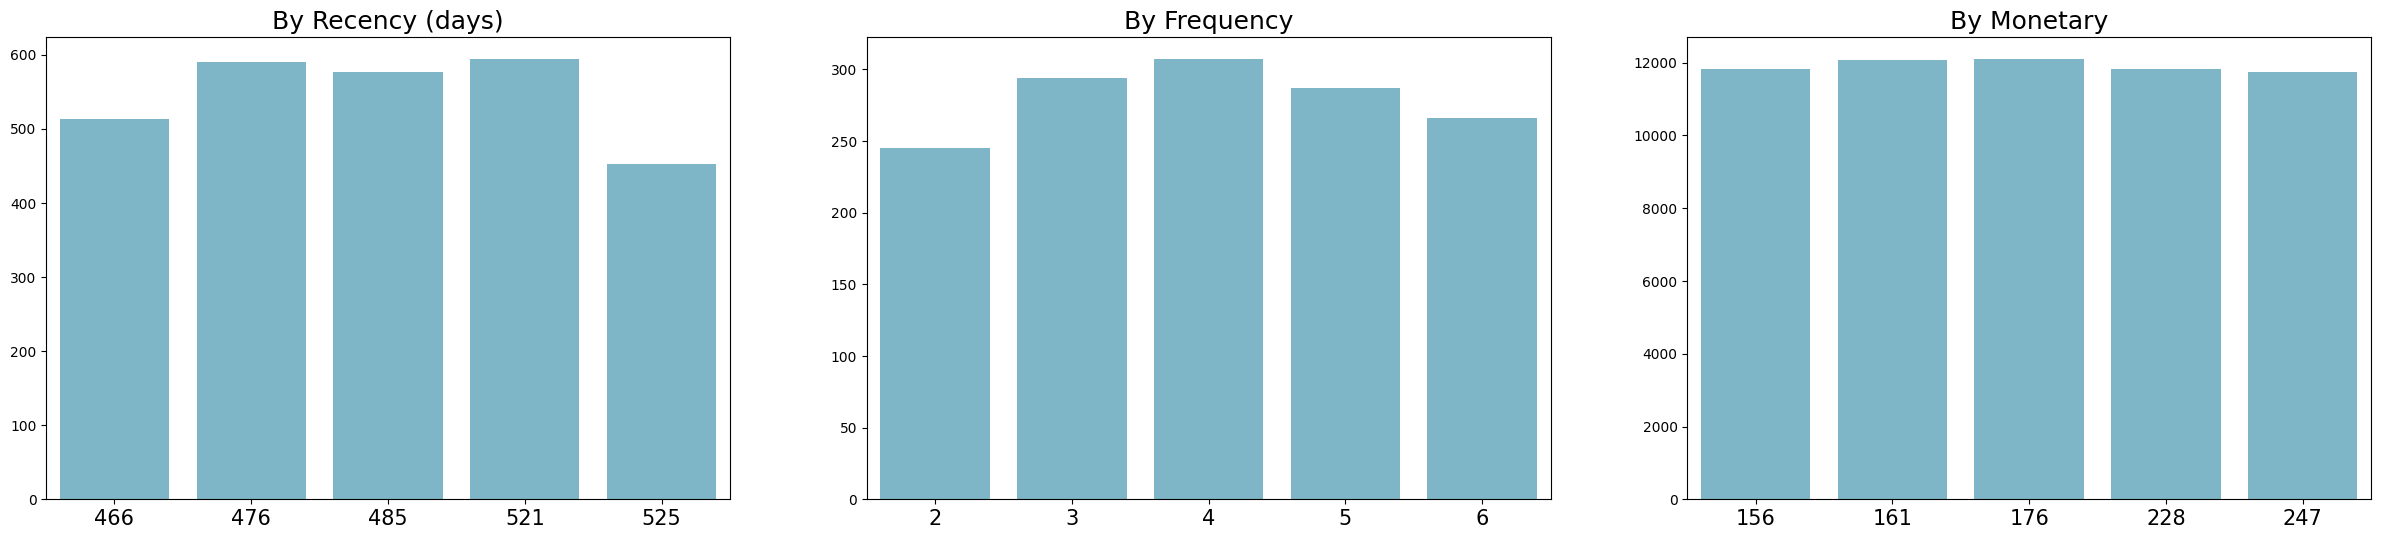

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="registered", data=rfm_df.sort_values(by="recency", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="registered", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="registered", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

In [33]:
new_dthour.to_csv("main_hour.csv", index=False)

In [33]:
dt_day.to_csv("main_day.csv", index=False)

## Conclusion

Dari hasil analisi : Peminjaman sepeda ini merupakan sistem berbagi sepeda dengan waktu harian yang dapat dipantau melalui sebuah sistem tertentu. Pada tahun 2012 mengalami pelonjakan peminjam yang mencapai 2049576 peminjaman dengan 2 kategori peminjam yaitu register dan casual. Faktor faktor eksternal mempengaruhi minat untuk meminjam dan juga kategori harian. Peminatan peminjaman sepeda meningkat pada saat hari-hari kerja dan jam strategis kerja. Banyak sekali peminjam harian dilakukan pada saat hari kerja. Pada 2012 pelonjakan paling tinggi terjadi pada tanggal 15 september, peminjaman mencapai  8714 orang. Di jam 11 mencapai 627 peminjam termasuk paling tinggi pada hari tersebut.

Rata-rata peminjaman ditahun 2012 pada saat hari kerja, kemungkinan besar kebutuhan untuk akomodasi berangkat. Pada saat cuaca cerah rata-rata peminjam mencapai 6003 orang, dan pada saat cuaca berkabut rata-rata peminnjam  4991 orang. Ini membutikan bahwasanya banyak sekali faktor yang mempengaruhi minat masyrakat dalam meminjam sepeda seperti cuaca, harian kerja, suhudaerah pada hari itu.